## Libraries importing

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [73]:
df = pd.read_csv('cleaned_airbnb_data.csv',index_col=0)
df.head()

,host_name,last_review,description,room_type,price/usd,boroughs,neighbourhood
listing_id,,,,,,,
2595,Jennifer,2019-05-21,Skylit Midtown Castle,Entire home/apt,225,Manhattan,Midtown
3831,LisaRoxanne,2019-07-05,Cozy Entire Floor of Brownstone,Entire home/apt,89,Brooklyn,Clinton Hill
5099,Chris,2019-06-22,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,Manhattan,Murray Hill
5178,Shunichi,2019-06-24,Large Furnished Room Near B'way,Private room,79,Manhattan,Hell's Kitchen
5238,Ben,2019-06-09,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,Manhattan,Chinatown


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25198 entries, 2595 to 36455809
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_name      25198 non-null  object
 1   last_review    25198 non-null  object
 2   description    25198 non-null  object
 3   room_type      25198 non-null  object
 4   price/usd      25198 non-null  int64 
 5   boroughs       25198 non-null  object
 6   neighbourhood  25198 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [62]:
df.describe()

,price/usd
count,25198.000000
mean,140.956901
std,130.985812
min,10.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,3000.000000


## Exploratory Data Analysis

#### Price distribution 

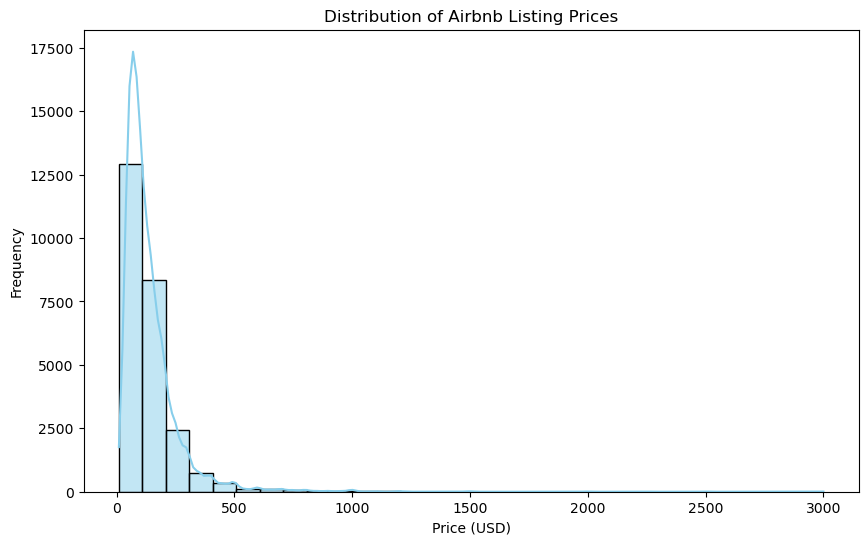

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(df['price/usd'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### Average price per borough

In [64]:
price_borough = df.groupby('boroughs')['price/usd'].mean().reset_index()


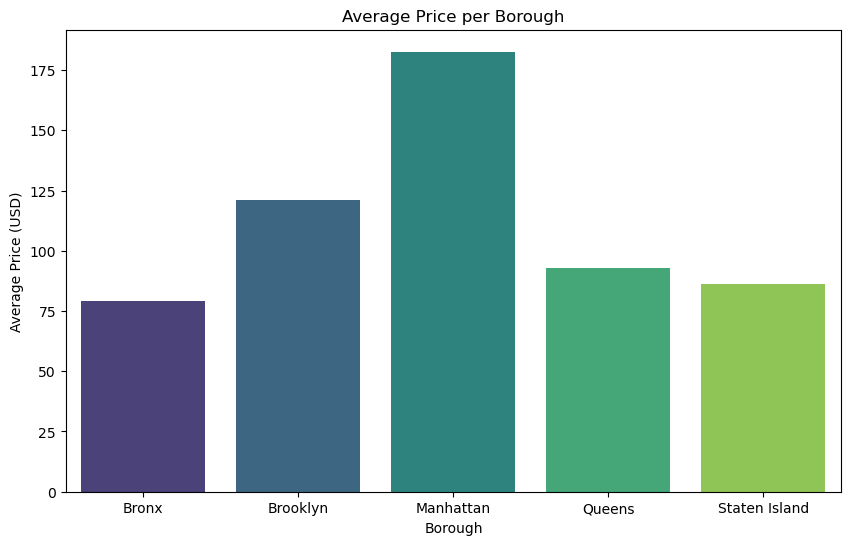

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(data = price_borough, x= 'boroughs', y='price/usd',palette='viridis',hue='boroughs')
plt.title('Average Price per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price (USD)')
plt.show()

#### Top 10 hosts with higher total price

In [66]:
top_10_hosts = df.groupby('host_name')['price/usd'].sum().reset_index().sort_values(by='price/usd', ascending = False).head(10)
top_10_hosts

,host_name,price/usd
6340,Sonder (NYC),55920
4641,Michael,35834
1533,David,31641
199,Alex,27490
3253,John,23218
5619,Red Awning,21864
1476,Daniel,15677
452,Anna,15249
1250,Chris,14707
4701,Mike,14234


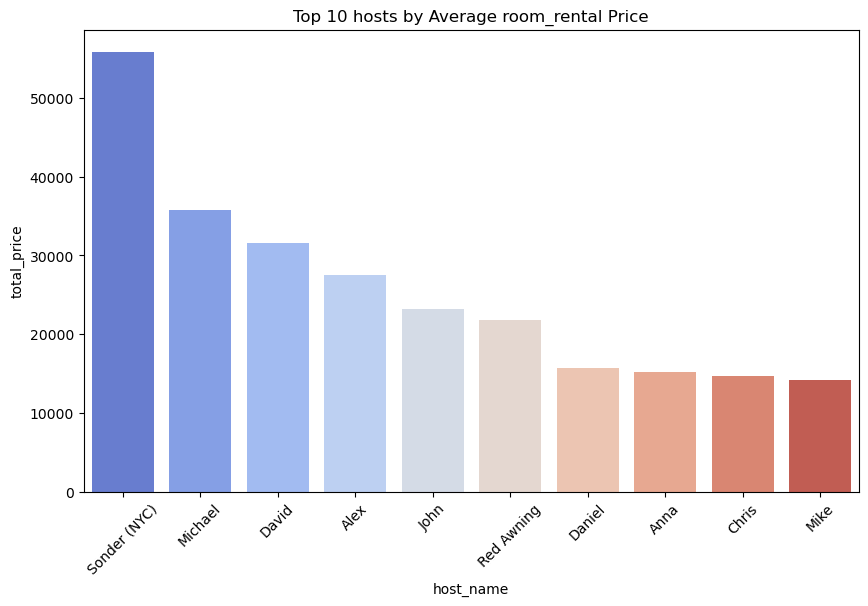

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_10_hosts,x='host_name',y='price/usd',palette='coolwarm',hue='host_name')
plt.title('Top 10 hosts by Average room_rental Price')
plt.ylabel('total_price')
plt.xlabel('host_name')
plt.xticks(rotation = 45);

#### Average price per room type

In [68]:
price_room = df.groupby('room_type')['price/usd'].mean().reset_index()

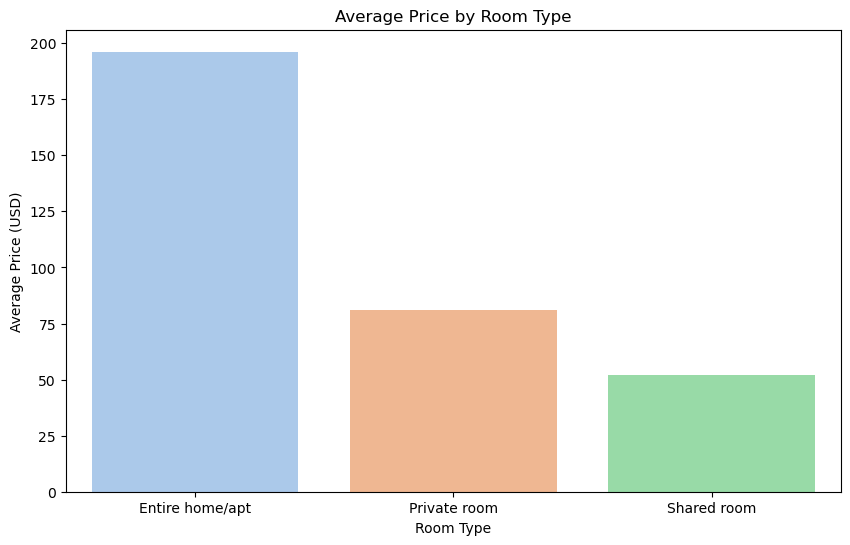

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='room_type', y='price/usd', errorbar=None,palette="pastel",hue='room_type')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Room Type')
plt.show()

#### Price change per month

In [76]:
#creating month column from Last_Review date
df['last_review'] = pd.to_datetime(df['last_review'])
df['month'] = df['last_review'].dt.month
df['month'].head()

listing_id
2595    5
3831    7
5099    6
5178    6
5238    6
Name: month, dtype: int32

In [81]:
#average price per month
price_month = df.groupby(['month', 'room_type'])['price/usd'].sum().reset_index()

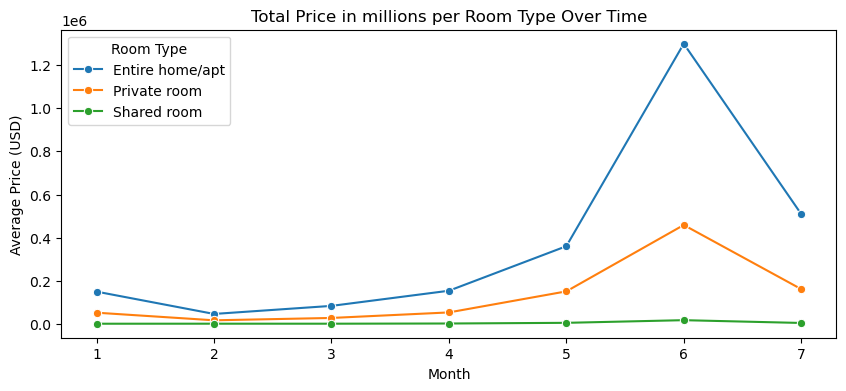

In [89]:
plt.figure(figsize=(10,4))
sns.lineplot(data=price_month,x='month',y='price/usd',hue='room_type',marker='o')
plt.title('Total Price in millions per Room Type Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.legend(title='Room Type')
plt.show()

#### Number of niebourhoods participating in the survey.

In [15]:
#number of unique boroughs
print(df['boroughs'].nunique())
print(df['boroughs'].value_counts())

5
boroughs
Brooklyn         10459
Manhattan        10319
Queens            3456
Bronx              697
Staten Island      267
Name: count, dtype: int64


In [20]:
#number of unique neibourhoods
print(df['neighbourhood'].nunique())
print(df['neighbourhood'].value_counts().head(10))

217
neighbourhood
Bedford-Stuyvesant    2206
Williamsburg          1853
Harlem                1434
Bushwick              1199
Hell's Kitchen        1119
East Village           866
Upper East Side        839
Upper West Side        774
Crown Heights          752
East Harlem            672
Name: count, dtype: int64


#### Which boroughs and which nieghbourhood has the most reviews?

In [10]:
# borough with the maximum reviews
df['boroughs'].value_counts().idxmax()

Brooklyn


In [13]:
# nb with the maximum reviews
df['neighbourhood'].value_counts().idxmax()

'Bedford-Stuyvesant'